# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Nick Nikolov

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.7 MB/s eta 0:00:00


## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [152]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
df.iloc[:, :5]

,0,1,2,3,4
0,15.26,14.84,0.8710,5.763,3.312
1,14.88,14.57,0.8811,5.554,3.333
2,14.29,14.09,0.9050,5.291,3.337
3,13.84,13.94,0.8955,5.324,3.379
4,16.14,14.99,0.9034,5.658,3.562
...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981
206,11.23,12.88,0.8511,5.140,2.795
207,13.20,13.66,0.8883,5.236,3.232
208,11.84,13.21,0.8521,5.175,2.836


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
y = df.iloc[:, 7]

x = df.iloc[:, :7]
print(y)
print(y.shape)
print(x)
print(x.shape)

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: 7, Length: 210, dtype: int64
(210,)
         0      1       2      3      4      5      6
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175
..     ...    ...     ...    ...    ...    ...    ...
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063

[210 rows x 7 columns]
(210, 7)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)*

*ANSWER HERE*
I would select a standard scaler since it is easiest to implement. I don't yet know any of the variance or mean properties of the data set to indicate that I need to use a different type of scaling.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, random_state=0)

In [5]:
# TODO: Print the shape of the training feature matrix and target vector
print(y_train.shape)
print(X_train.shape)

(157,)
(157, 7)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [54]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

grid_search = GridSearchCV(l_model, param_grid, cv=5)

#Fit Modedls
grid_search.fit(X_train_scaled, y_train)

#Find the best parameters
parameters = grid_search.best_params_

#SCoring metrics
results = grid_search.cv_results_

#TEST - (From lab 6)
# Print the results for accuracy and F1
print("\nTesting score:  ", grid_search.score(X_val_scaled, y_val))
print("\nThe best parameters found: ", parameters)


Testing score:   0.9433962264150944

The best parameters found:  {'C': 10.0, 'fit_intercept': True}


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

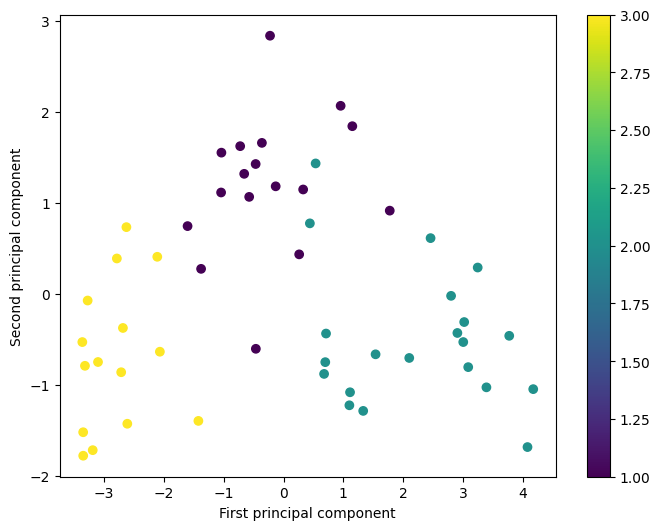

In [94]:
# TODO: Predict y labels using best estimator
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#best parameters were C = 10.0, with fit-inetercept = True
lr = LogisticRegression(C = 10.0, fit_intercept = True).fit(X_train_scaled, y_train)
y_pred = lr.predict(X_val_scaled)

pca = PCA(2)
pca_result = pca.fit_transform(X_val_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, 3)])

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
            c=y_val,
            alpha=1)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar();

In [ ]:
# TODO: Reduce dimensions of test data for plotting

In [ ]:
# TODO: Plot test points colored by predicted label

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
The logistic regression had a 0.94 testing accuracy so it did work well on this dataset.

1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*
PCA was used to categorize the data into the three classifications. Based on the above coloured graph, it looks like there clear separation between the components so it did work well. Class 3 and 1 do have some overlap though.


*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

a. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
b. Lab 5, Lab 6, Linear classification exercise, scaling.ipynb,


1. In what order did you complete the steps?
In order.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I used ChatGPT to let me with a dimension issue in the plot. It didn't help me and I continued getting the error. Experimenting with the PCA Applicatoins exercise helped fix my issue.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes. I was stuck figuring out exactly what PCA does and how to set up the PCA plot. I still don't think I understand it perfectly. But now that I see the density of the classes it makes more sense.


*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).

In [86]:
# TODO: Scale feature matrix
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

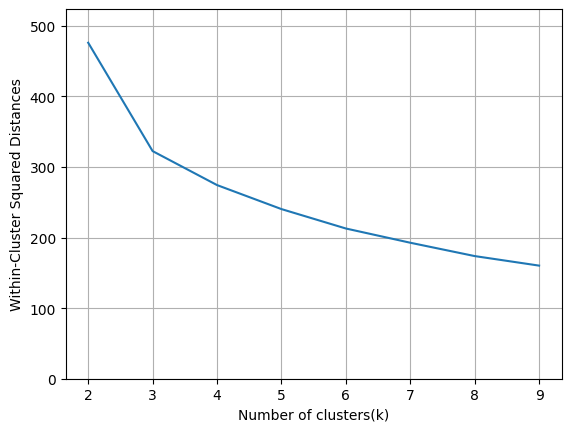

In [87]:
# TODO: Use the elbow method to determine the optimal number of clusters
#finding_k.ipynb, kmeans example.ipynb
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X_train_scaled)
    inertia.append(kmeans.inertia_ )

inertias = pd.DataFrame({'n_clusters': range(2, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)


#The graph starts bending at k = 3

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [89]:
# TODO: Implement K-means with the number of clusters determined in the previous step
y_pred = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_scale)


In [154]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=4, n_init=10).fit(X_train_scaled)

silhouette = silhouette_score(X_train_scaled, kmeans.labels_ )
chs_score = calinski_harabasz_score(X_train_scaled, kmeans.labels_ )
db_score = davies_bouldin_score(X_train_scaled, kmeans.labels_)

print("Silhouette Score: " + str(silhouette))
print("Calinski-Harabasz score: " + str(chs_score))
print("Davies-Bouldin score: " + str(db_score))


Silhouette Score: 0.39171826743350274
Calinski-Harabasz score: 185.41107270397373
Davies-Bouldin score: 0.955893174327152


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

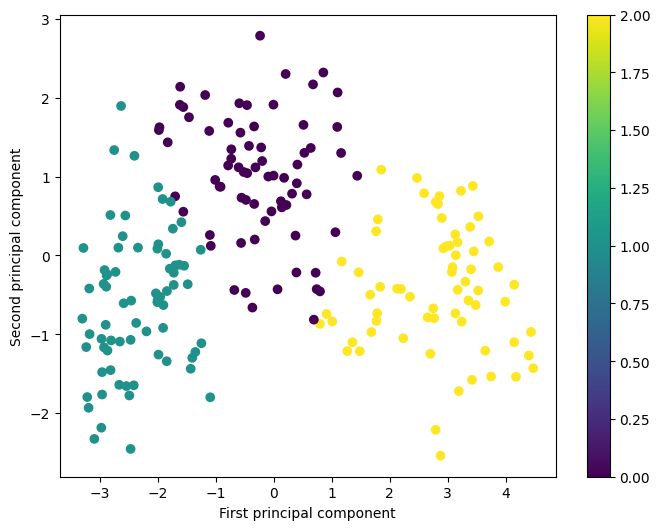

In [102]:
# TODO: Plot clustering results
import mglearn
kmeans.fit(X_scale)

pca = PCA(2)
pca_result = pca.fit_transform(X_scale)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, 3)])

# Visualize the first two principal components

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
            c=kmeans.labels_,
            alpha=1)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar();

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

2


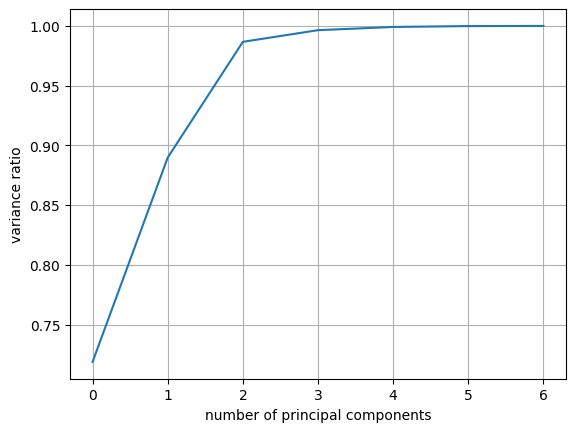

In [118]:
# TODO: Find the number of principal components using explained variance ratio
pca_all = PCA()
pca_all.fit(X_scale)

plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('variance ratio')
plt.grid(True)

n = np.where(np.cumsum(pca_all.explained_variance_ratio_) >= 0.95)[0][0]
print(n)

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [135]:
# TODO: Use PCA to transform the data result: n = 2
pca = PCA(n)
pca_all = pca.fit_transform(X_scale)

In [141]:
# TODO: Implement K-means with the transformed data
yk_means = KMeans(n_clusters=3, random_state=0, n_init=10).fit(pca_all)


In [155]:
# TODO: Calculate the three different validation metrics
silhouette_pca = silhouette_score(pca_all, yk_means.labels_ )
chs_score_pca = calinski_harabasz_score(pca_all, yk_means.labels_ )
db_score_pca = davies_bouldin_score(pca_all, yk_means.labels_)

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [157]:
# TODO: Display results

print("Validation Metrics:")
print("---------------------")
print("{:<25} {:<10} {:<10}".format("Metric", "With PCA", "Without PCA"))
print("--------------------------------")

print("{:<25} {:<10} {:<10}".format("Silhouette Score:", silhouette_pca, silhouette))
print("{:<25} {:<10} {:<10}".format("Calinski-Harabasz Score:", chs_score_pca, chs_score))
print("{:<25} {:<10} {:<10}".format("Davies-Bouldin Score:", db_score_pca, db_score))


Validation Metrics:
---------------------
Metric                    With PCA   Without PCA
--------------------------------
Silhouette Score:         0.4928434916240086 0.39171826743350274
Calinski-Harabasz Score:  397.00858946651357 185.41107270397373
Davies-Bouldin Score:     0.7083801812756491 0.955893174327152


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
Yes given that we have 3 classifications, ideally we would be able to cluster the data into those 3 classes perfectly.


1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
The results look much more dense in the second plot. However the trend is very similar.


1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*
To explain 95% of the variance only 2 components were required. The results with PCA did improve across all the metrics checked.


*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?
Labs, extra exercises, scikit learn documentation, stackoverflow

1. In what order did you complete the steps?
Numerical Order

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
Yes I used ChatGPT to tell me fix error messages. Most of the errors it was not able to help me with. But when I accidentally overrode the silhouette_score function it caught that frustrating error for me.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
I had a ton of challenges with this assignment. Most of them due to using validation, training, or PCA data in wrong places and none of the dimensions were working. Another error was due to accidentally overriding the silhouette score function. Another error is due to the version of a python library that is corrupt on the latest MacOS (threadpoolctl). This was giving me an error while using KMeans models. Importing the jupyter notebook into google collab fixed the versioning errors finally.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

Out of all of the assignments this was by far my least favorite and most frustrating assignment. Setting up PCA, when to use the training and testing data sets. All extremely confusing.

*ADD YOUR THOUGHTS HERE*